# python 3 or 2.7?????

In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import datetime

from datetime import timedelta, datetime, date
import calendar

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
!which python

/home/clepore/.conda/envs/general_python3/bin/python


In [3]:
import os
os.environ['R_HOME'] = '/home/clepore/.conda/envs/general_python2_7/bin/R/' #path to your R installation


In [4]:
os.environ

environ{'PROJ_LIB': '/home/clepore/.conda/envs/general_python3/share/proj',
        '_CONDA_SET_PROJ_LIB': 'PROJ_LIB',
        'MANPATH': '/software/centos6/x86_64/miniconda3/share/man:/usr/share/man',
        'HOSTNAME': 'mako3.ldeo.columbia.edu',
        'OLD_NCARG_ROOT': '/usr',
        'TERM': 'xterm-color',
        'SHELL': '/bin/bash',
        'HISTSIZE': '1000',
        'SSH_CLIENT': '129.236.70.41 57388 22',
        'CONDA_SHLVL': '1',
        'CONDA_PROMPT_MODIFIER': '(general_python3) ',
        'OLD_NCARG_DATABASE': '/usr/lib64/ncarg/database',
        'OLD_NCARG_GRAPHCAPS': '/usr/lib64/ncarg/graphcaps',
        'QTDIR': '/usr/lib64/qt-3.3',
        'QTINC': '/usr/lib64/qt-3.3/include',
        'SSH_TTY': '/dev/pts/0',
        'USER': 'clepore',
        'UDUNITS2_XML_PATH': '/home/clepore/.conda/envs/general_python3/share/udunits/udunits2.xml',
        'LS_COLORS': 'rs=0:di=38;5;27:ln=38;5;51:mh=44;38;5;15:pi=40;38;5;11:so=38;5;13:do=38;5;5:bd=48;5;232;38;5;11:cd=48;5;232;38

In [5]:
!which R

/usr/bin/R


In [6]:
#%load_ext rpy2.ipython

In [7]:
import os


In [8]:
import Nio
import glob

In [9]:
!ls /Data2/SubX/EMC/GEFS/tdps_sfc/


1999  2001  2003  2005	2007  2009  2011  2013	2015
2000  2002  2004  2006	2008  2010  2012  2014	2016


In [10]:
!wgrib2 -v /Data2/SubX/EMC/GEFS/cape/1999/06/cape_GEFS_02jun1999_00z_d01_d35_m00.grb2 

1:0:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:1 day fcst:ENS=low-res ctl
2:46954:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:2 day fcst:ENS=low-res ctl
3:92924:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:3 day fcst:ENS=low-res ctl
4:139690:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:4 day fcst:ENS=low-res ctl
5:186582:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:5 day fcst:ENS=low-res ctl
6:233994:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:6 day fcst:ENS=low-res ctl
7:281218:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:7 day fcst:ENS=low-res ctl
8:328742:d=1999060200:CAPE Convective Available Potential Energy [J/kg]:180-0 mb above ground:8 day fcst:ENS=low-res ctl
9:375455:d=1999060200:CAPE Convective A

In [11]:
ds = xr.open_dataset('/Data2/SubX/EMC/GEFS/pr_sfc/1999/06/pr_sfc_GEFS_02jun1999_00z_d01_d35_m00.grb2', 
                     engine='pynio')
ds

<xarray.Dataset>
Dimensions:          (forecast_time0: 35, lat_0: 181, lon_0: 360)
Coordinates:
  * lat_0            (lat_0) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * lon_0            (lon_0) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * forecast_time0   (forecast_time0) timedelta64[ns] 01:00:00 ... 1 days 11:00:00
Data variables:
    APCP_P1_L1_GLL0  (forecast_time0, lat_0, lon_0) float32 ...

In [12]:
ds  = ds.rename({list(ds.variables.keys())[0]:'pr', 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
ds

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 360, time: 35)
Coordinates:
  * lat      (lat) float32 90.0 89.0 88.0 87.0 86.0 ... -87.0 -88.0 -89.0 -90.0
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) timedelta64[ns] 01:00:00 02:00:00 ... 1 days 11:00:00
Data variables:
    pr       (time, lat, lon) float32 ...

In [13]:
ds.coords['time']=np.arange(0.5,35.5)
ds.lon

<xarray.DataArray 'lon' (lon: 360)>
array([  0.,   1.,   2., ..., 357., 358., 359.], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Attributes:
    long_name:  longitude
    grid_type:  Latitude/Longitude
    units:      degrees_east
    Dj:         [1.]
    Di:         [1.]
    Lo2:        [359.]
    La2:        [-90.]
    Lo1:        [0.]
    La1:        [90.]

####  The start time is at 00z the lead times at 12z - I am going to ignore this for the time being since I look at some accumulated/maximum weekly value

In [14]:
# def ppf(ds):
#     ds.coords['S'] = 'S', np.atleast_1d(ds.time[0].values) # I am setting S equal to the first time of the lead time, 
#                                                            # we can change that
#     return ds

In [15]:
def ppf2_filename(ds,filename):

#     print( ds[list(ds.variables.keys())[0]].encoding['source'])
    ds  = ds.rename({ 'lon_0':'lon', 'lat_0':'lat', 'forecast_time0':'time'})
    ts = filename.split('_')
    whereGEFS = ts.index('GEFS')
    dateSstr = ts[whereGEFS+1]
    dateS = datetime.strptime(dateSstr, '%d%b%Y')
    ds.coords['S'] = 'S', np.atleast_1d(dateS)
    ds.rename({'time':'L'}, inplace=True)
    ds.coords['L']=np.arange(0.5,35.5)
#     ds.coords['L']=((ds.L-ds.S)/ np.timedelta64(1,'D')).squeeze()
    ds = ds.sel(lat=slice(42,32),lon=slice(-103+360,-90+360))
    return ds

In [16]:
varname = 'pr_sfc'
ds_Y = []
for iy in np.arange(1999, 2017):
    print( iy)
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allpr = xr.concat(ds_Y, dim='S')
del ds_Y
         
        
        
#     pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
#     pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print( pr_S)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [17]:
ds_allpr.S

<xarray.DataArray 'S' (S: 237)>
array(['1999-06-02T00:00:00.000000000', '1999-06-09T00:00:00.000000000',
       '1999-06-16T00:00:00.000000000', ..., '2016-08-17T00:00:00.000000000',
       '2016-08-24T00:00:00.000000000', '2016-08-31T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-24 2016-08-31

In [18]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    print( iy)
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
         
        
        
#     pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
#     pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print( pr_S)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [19]:
varname = 'tas_2m'
ds_Y = []
for iy in np.arange(1999, 2017):
    print( iy)
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltas_2m = xr.concat(ds_Y, dim='S')
del ds_Y
         
        
        
#     pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
#     pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print( pr_S)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [20]:

varname = 'tdps_sfc'
ds_Y = []
for iy in np.arange(1999, 2017):
    print( iy)
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_alltdps_2m = xr.concat(ds_Y, dim='S')
del ds_Y
         
        
        
#     pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
#     pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print( pr_S)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2014
2015
2016


In [21]:

varname = 'cape'
ds_Y = []
for iy in np.arange(1999, 2017):
    print( iy)
    ds_M = []
    for ensnum in np.arange(0,11):
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/06/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/07/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
    #     ds_M.append(pr_S)
    #     del pr_S
        mylist = glob.glob('/Data2/SubX/EMC/GEFS/'+varname+'/'+np.str(iy)+'/08/*_m'+np.str(ensnum).zfill(2) +'.grb2') 
#         print(len(mylist))
        pr_S_list = []
        for ifilename in mylist:
            dstemp = xr.open_dataset(ifilename, autoclose=True, engine='pynio')
            dstemp.coords['M'] = 'M', np.atleast_1d(ensnum)
            dstemp1 = ppf2_filename(dstemp, ifilename)
    #         print( dstemp1)
            del dstemp
            pr_S_list.append(dstemp1)
            del dstemp1
        pr_S = pr_S.merge(xr.concat(pr_S_list, dim='S'))
    #     pr_S = xr.concat(pr_S_list, dim='S')
        ds_M.append(pr_S)
        del pr_S
    ds_all = xr.concat(ds_M, dim='M')
    del ds_M
    ds_Y.append(ds_all)
del ds_all
ds_allcape = xr.concat(ds_Y, dim='S')
del ds_Y
         
        
        
#     pr_S=xr.open_mfdataset(mylist, concat_dim='S', preprocess=ppf2, autoclose=True, engine='pynio')
#     pr_S.coords['M'] = 'M', np.atleast_1d(ensnum)
#     print( pr_S)

1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [22]:
whos


Variable        Type        Data/Info
-------------------------------------
Nio             module      <module 'Nio' from '/home<...>e-packages/PyNIO/Nio.py'>
calendar        module      <module 'calendar' from '<...>b/python3.6/calendar.py'>
date            type        <class 'datetime.date'>
datetime        type        <class 'datetime.datetime'>
ds              Dataset     <xarray.Dataset>\nDimensi<...>me, lat, lon) float32 ...
ds_allcape      Dataset     <xarray.Dataset>\nDimensi<...>0 2.0 0.0 ... 166.0 188.0
ds_allpr        Dataset     <xarray.Dataset>\nDimensi<...>2 0.0 0.0 0.0 ... 0.9 1.5
ds_alltas_2m    Dataset     <xarray.Dataset>\nDimensi<...>292.80002 292.2 ... 297.9
ds_alltdps_2m   Dataset     <xarray.Dataset>\nDimensi<...>2 276.30002 ... 289.44998
ensnum          int64       10
glob            module      <module 'glob' from '/hom<...>3/lib/python3.6/glob.py'>
ifilename       str         /Data2/SubX/EMC/GEFS/cape<...>2016_00z_d01_d35_m10.grb2
iy              int64       2

# MERGE THEM IN ONE DATAARRAY

In [23]:
ds_allpr.merge(ds_alltas_2m, inplace=True)

<xarray.Dataset>
Dimensions:           (L: 35, M: 11, S: 237, lat: 11, lon: 14)
Coordinates:
  * lat               (lat) float32 42.0 41.0 40.0 39.0 ... 35.0 34.0 33.0 32.0
  * lon               (lon) float32 257.0 258.0 259.0 ... 268.0 269.0 270.0
  * L                 (L) float64 0.5 1.5 2.5 3.5 4.5 ... 31.5 32.5 33.5 34.5
  * M                 (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * S                 (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-31
Data variables:
    APCP_P1_L1_GLL0   (M, S, L, lat, lon) float32 0.0 0.0 0.0 ... 0.9 1.5
    TMP_P1_L103_GLL0  (M, S, L, lat, lon) float32 292.80002 292.2 ... 297.9

In [24]:
ds_allpr.merge(ds_alltdps_2m, inplace=True)

<xarray.Dataset>
Dimensions:           (L: 35, M: 11, S: 237, lat: 11, lon: 14)
Coordinates:
  * lat               (lat) float32 42.0 41.0 40.0 39.0 ... 35.0 34.0 33.0 32.0
  * lon               (lon) float32 257.0 258.0 259.0 ... 268.0 269.0 270.0
  * L                 (L) float64 0.5 1.5 2.5 3.5 4.5 ... 31.5 32.5 33.5 34.5
  * M                 (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * S                 (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-31
Data variables:
    APCP_P1_L1_GLL0   (M, S, L, lat, lon) float32 0.0 0.0 0.0 ... 0.9 1.5
    TMP_P1_L103_GLL0  (M, S, L, lat, lon) float32 292.80002 292.2 ... 297.9
    DPT_P1_L103_GLL0  (M, S, L, lat, lon) float32 274.2 276.30002 ... 289.44998

In [25]:
ds_allpr.merge(ds_allcape, inplace=True)

<xarray.Dataset>
Dimensions:             (L: 35, M: 11, S: 237, lat: 11, lon: 14)
Coordinates:
  * lat                 (lat) float32 42.0 41.0 40.0 39.0 ... 34.0 33.0 32.0
  * lon                 (lon) float32 257.0 258.0 259.0 ... 268.0 269.0 270.0
  * L                   (L) float64 0.5 1.5 2.5 3.5 4.5 ... 31.5 32.5 33.5 34.5
  * M                   (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * S                   (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-31
Data variables:
    APCP_P1_L1_GLL0     (M, S, L, lat, lon) float32 0.0 0.0 0.0 ... 0.9 1.5
    TMP_P1_L103_GLL0    (M, S, L, lat, lon) float32 292.80002 292.2 ... 297.9
    DPT_P1_L103_GLL0    (M, S, L, lat, lon) float32 274.2 ... 289.44998
    CAPE_P1_2L108_GLL0  (M, S, L, lat, lon) float32 0.0 2.0 0.0 ... 166.0 188.0

In [26]:
del ds_allcape

In [27]:
del ds_alltdps_2m


In [28]:
del ds_alltas_2m
# del ds_alltdps_2m
# del ds_allcape

In [29]:
ds_allpr.to_netcdf('ds_pr_t_td_EMC.nc')

# SELECT LEAD TIMES

In [696]:
whos

Variable                      Type                    Data/Info
---------------------------------------------------------------
AA                            ndarray                 18249: 18249 elems, type `float64`, 145992 bytes (142.5703125 kb)
BB                            ndarray                 18249: 18249 elems, type `float64`, 145992 bytes (142.5703125 kb)
DFTEMP                        DataFrame                                        <...>[401478 rows x 5 columns]
LogisticRegression            type                    <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
NN                            int                     237
Nio                           module                  <module 'Nio' from '/home<...>e-packages/PyNIO/Nio.py'>
PREDICTION_A                  Series                  32942    0.035438\n11752 <...>th: 18249, dtype: float64
PREDICTION_B                  Series                  32942    0.022112\n11752 <...>th: 18249, dtype: float64
REAL                    

week1lr                       Dataset                 <xarray.Dataset>\nDimensi<...>.2857 ... 332.0 211.14285
week1lrStoT                   Dataset                 <xarray.Dataset>\nDimensi<...>.2857 ... 332.0 211.14285
week1lr_all                   Dataset                 <xarray.Dataset>\nDimensi<...>4.0 ... 176.0 221.0 195.0
week1lr_us                    Dataset                 <xarray.Dataset>\nDimensi<...>57144 ... 332.0 211.14285
week2                         Dataset                 <xarray.Dataset>\nDimensi<...>2.0 ... 292.0 292.0 292.0
whichytest                    Int64Index              Int64Index([2058, 2417,  <...>ype='int64', length=1304)
xr                            module                  <module 'xarray' from '/h<...>ages/xarray/__init__.py'>
y                             DataFrame                          y\n0      Fals<...>n[36498 rows x 1 columns]
y_pred                        ndarray                 18249: 18249 elems, type `int64`, 145992 bytes (142.5703125 kb)
y_

In [698]:
week1 = ds_allpr.sel(L=slice(1.5,7.5))
week1 = week1.stack(MSll=('M','S','lat','lon','L')).compute()
week1

<xarray.Dataset>
Dimensions:             (MSll: 2810346)
Coordinates:
  * MSll                (MSll) MultiIndex
  - M                   (MSll) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 1999-06-02
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 42.0 42.0 42.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 260.0 261.0 261.0
  - L                   (MSll) float64 1.5 2.5 3.5 4.5 5.5 ... 6.5 7.5 1.5 2.5
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 0.0 0.0 0.0 5.1 ... 0.0 0.0 0.59999996
    TMP_P1_L103_GLL0    (MSll) float32 295.7 295.80002 ... 298.91998 299.63
    DPT_P1_L103_GLL0    (MSll) float32 278.1 272.5 271.5 ... 289.15 292.58
    CAPE_P1_2L108_GLL0  (MSll) float32 76.0 0.0 30.0 15.0 ... 244.0 3.0 195.0

In [279]:
week1M = ds_allpr.sel(L=slice(1.5,7.5))
week1M = week1M.stack(MSll=('S','lat','lon','L')).mean('M').compute()
week1M

<xarray.Dataset>
Dimensions:             (MSll: 255486)
Coordinates:
  * MSll                (MSll) MultiIndex
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 1999-06-02
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 42.0 42.0 42.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 260.0 261.0 261.0
  - L                   (MSll) float64 1.5 2.5 3.5 4.5 5.5 ... 6.5 7.5 1.5 2.5
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 1.7909092 0.06363636 ... 0.08181818
    TMP_P1_L103_GLL0    (MSll) float32 295.18637 295.24548 ... 300.48456
    DPT_P1_L103_GLL0    (MSll) float32 279.45456 275.52728 ... 292.95544
    CAPE_P1_2L108_GLL0  (MSll) float32 359.81818 164.18182 ... 525.0 482.18182

In [281]:
week1M.coords['MSll'] = np.arange(0,255486) 
week1M
week1M.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 'DPT_P1_L103_GLL0':'tdps'}, inplace=True)

<xarray.Dataset>
Dimensions:             (MSll: 255486)
Coordinates:
  * MSll                (MSll) int64 0 1 2 3 4 ... 255482 255483 255484 255485
Data variables:
    pr                  (MSll) float32 1.7909092 0.06363636 ... 0.08181818
    tas                 (MSll) float32 295.18637 295.24548 ... 300.48456
    tdps                (MSll) float32 279.45456 275.52728 ... 292.95544
    CAPE_P1_2L108_GLL0  (MSll) float32 359.81818 164.18182 ... 525.0 482.18182

In [31]:
week1.coords['MSll'] = np.arange(0,2810346) 
week1

<xarray.Dataset>
Dimensions:             (MSll: 2810346)
Coordinates:
  * MSll                (MSll) int64 0 1 2 3 ... 2810342 2810343 2810344 2810345
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 0.0 0.0 0.0 5.1 ... 0.0 0.0 0.59999996
    TMP_P1_L103_GLL0    (MSll) float32 295.7 295.80002 ... 298.91998 299.63
    DPT_P1_L103_GLL0    (MSll) float32 278.1 272.5 271.5 ... 289.15 292.58
    CAPE_P1_2L108_GLL0  (MSll) float32 76.0 0.0 30.0 15.0 ... 244.0 3.0 195.0

In [32]:
week1.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 'DPT_P1_L103_GLL0':'tdps'}, inplace=True)

<xarray.Dataset>
Dimensions:             (MSll: 2810346)
Coordinates:
  * MSll                (MSll) int64 0 1 2 3 ... 2810342 2810343 2810344 2810345
Data variables:
    pr                  (MSll) float32 0.0 0.0 0.0 5.1 ... 0.0 0.0 0.59999996
    tas                 (MSll) float32 295.7 295.80002 ... 298.91998 299.63
    tdps                (MSll) float32 278.1 272.5 271.5 ... 289.15 292.58
    CAPE_P1_2L108_GLL0  (MSll) float32 76.0 0.0 30.0 15.0 ... 244.0 3.0 195.0

In [282]:
# plt.hist(week1.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tasb"] = to_bin(week1.tas)
week1M["tasb"] = to_bin(week1M.tas)

# 

# plt.hist(week1.tasb.values.ravel(),bins=20)

In [295]:
grouped1M = week1M[['pr','tasb']].groupby('tasb')
ds_groupM = grouped1M.max()
ds_groupM.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_groupM['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_groupM.quantiles.values),len(ds_groupM.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1M):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>100:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_groupM['pr_q'].loc[dict(tasb=k)] = var

ds_groupM


0 (15,)
1 (92,)
2 (497,)
3 (1840,)
4 (5166,)
5 (11595,)
6 (20672,)
7 (32930,)
8 (48606,)
9 (57577,)
10 (46213,)
11 (23151,)
12 (6601,)
13 (527,)
14 (4,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 15)
Coordinates:
  * tasb       (tasb) float64 284.0 286.0 288.0 290.0 ... 308.0 310.0 312.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 10.68 17.8 56.66 56.42 ... 22.49 8.609 1.6 0.1182
    pr_q       (quantiles, tasb) float64 0.0 0.0 3.991 2.979 ... 7.301 1.591 0.0

In [291]:
grouped1 = week1[['pr','tasb']].groupby('tasb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tasb=k)] = var

ds_group


0 (8,)
1 (88,)
2 (540,)
3 (2425,)
4 (10201,)
5 (28179,)
6 (75831,)
7 (135250,)
8 (247143,)
9 (335105,)
10 (511018,)
11 (554404,)
12 (512948,)
13 (266921,)
14 (109025,)
15 (19415,)
16 (1821,)
17 (24,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 18)
Coordinates:
  * tasb       (tasb) float64 280.0 282.0 284.0 286.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 5.8 37.1 61.3 100.8 120.4 ... 68.2 19.1 5.5 0.22
    pr_q       (quantiles, tasb) float64 0.0 0.0 5.3 3.39 ... 15.78 5.227 0.0

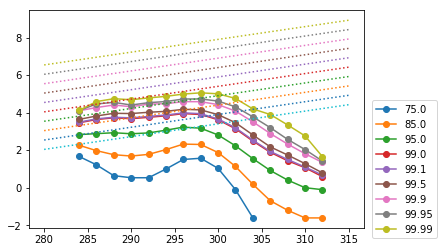

In [292]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


In [699]:
week2 = ds_allpr.sel(L=slice(8.5,14.5))
week2 = week2.stack(MSll=('M','S','lat','lon','L')).compute()
week2
week2M = ds_allpr.sel(L=slice(8.5,14.5))
week2M = week2M.stack(MSll=('S','lat','lon','L')).mean('M').compute()
week2M

<xarray.Dataset>
Dimensions:             (MSll: 255486)
Coordinates:
  * MSll                (MSll) MultiIndex
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 1999-06-02
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 42.0 42.0 42.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 260.0 261.0 261.0
  - L                   (MSll) float64 8.5 9.5 10.5 11.5 ... 13.5 14.5 8.5 9.5
Data variables:
    APCP_P1_L1_GLL0     (MSll) float32 8.49 3.2099998 ... 2.7327273 1.7518182
    TMP_P1_L103_GLL0    (MSll) float32 291.72546 291.66818 ... 298.5764 297.7082
    DPT_P1_L103_GLL0    (MSll) float32 280.03638 280.35455 ... 289.27362
    CAPE_P1_2L108_GLL0  (MSll) float32 547.9091 313.63635 ... 388.72726

In [700]:
week2.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 'DPT_P1_L103_GLL0':'tdps'}, inplace=True)
week2M.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 'DPT_P1_L103_GLL0':'tdps'}, inplace=True)

<xarray.Dataset>
Dimensions:             (MSll: 255486)
Coordinates:
  * MSll                (MSll) MultiIndex
  - S                   (MSll) datetime64[ns] 1999-06-02 ... 1999-06-02
  - lat                 (MSll) float64 42.0 42.0 42.0 42.0 ... 42.0 42.0 42.0
  - lon                 (MSll) float64 257.0 257.0 257.0 ... 260.0 261.0 261.0
  - L                   (MSll) float64 8.5 9.5 10.5 11.5 ... 13.5 14.5 8.5 9.5
Data variables:
    pr                  (MSll) float32 8.49 3.2099998 ... 2.7327273 1.7518182
    tas                 (MSll) float32 291.72546 291.66818 ... 298.5764 297.7082
    tdps                (MSll) float32 280.03638 280.35455 ... 289.27362
    CAPE_P1_2L108_GLL0  (MSll) float32 547.9091 313.63635 ... 388.72726

In [701]:
week2.coords['MSll'] = np.arange(0,2810346) 
week2M.coords['MSll'] = np.arange(0,255486) 


In [702]:
# plt.hist(week2.tas.values.ravel())

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tasb"] = to_bin(week2.tas)
week2M["tasb"] = to_bin(week2M.tas)
# 

# plt.hist(week2.tasb.values.ravel(),bins=20)

In [707]:
grouped2M = week2M[['pr','tasb']].groupby('tasb')
ds_group2M = grouped2M.max()
ds_group2M.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2M['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2M.quantiles.values),len(ds_group2M.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2M):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>100:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2M['pr_q'].loc[dict(tasb=k)] = var

ds_group2M


0 (23,)
1 (386,)
2 (1468,)
3 (4698,)
4 (14140,)
5 (32299,)
6 (58851,)
7 (75370,)
8 (50991,)
9 (15630,)
10 (1603,)
11 (27,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 12)
Coordinates:
  * tasb       (tasb) float64 288.0 290.0 292.0 294.0 ... 306.0 308.0 310.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 9.536 21.75 19.71 26.23 ... 15.51 7.709 0.6791
    pr_q       (quantiles, tasb) float64 0.0 4.012 4.297 ... 14.02 7.555 0.0

In [708]:
grouped2 = week2[['pr','tasb']].groupby('tasb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tasb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tasb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>100:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tasb=k)] = var

ds_group2


0 (4,)
1 (31,)
2 (94,)
3 (588,)
4 (2438,)
5 (8504,)
6 (23144,)
7 (60721,)
8 (110771,)
9 (207838,)
10 (303319,)
11 (513852,)
12 (605158,)
13 (565149,)
14 (280315,)
15 (107108,)
16 (19041,)
17 (2216,)
18 (55,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tasb: 19)
Coordinates:
  * tasb       (tasb) float64 278.0 280.0 282.0 284.0 ... 310.0 312.0 314.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tasb) float64 16.55 28.8 31.36 90.1 91.2 ... 75.1 13.8 3.5 2.0
    pr_q       (quantiles, tasb) float64 0.0 0.0 0.0 4.1 ... 7.419 3.456 0.0

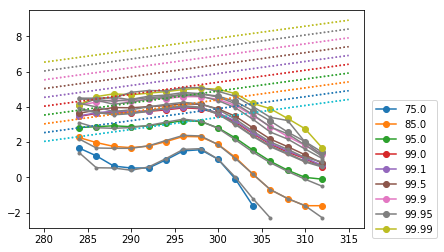

In [287]:
plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')
    
plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'.-', color='grey')
plt.legend(ds_group2.quantiles.values, bbox_to_anchor=(1.01,0.61))
# plt.xlim((287,315))
for iim in np.arange(-17,-12,0.5):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':')


Text(0, 0.5, '$lnI$')

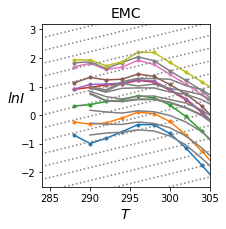

In [709]:
# plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-29,-11,0.5):
#     plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
    
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('EMC')
# plt.ylim((-1,6))
# plt.xlim((282,312))

plt.figure(figsize=(3,3))
# plt.plot(ds_group.tasb,np.log(ds_group.pr_q.T/8),'.-')
# plt.plot(ds_group2.tasb,np.log(ds_group2.pr_q.T/8),'-', color='grey')
plt.plot(ds_groupM.tasb,np.log(ds_groupM.pr_q.T/8),'.-')
plt.plot(ds_group2M.tasb,np.log(ds_group2M.pr_q.T/8),'-', color='grey')
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.45):
    plt.plot(np.array([280,315]),iim+0.068*np.array([280,315]),':', color='grey')
plt.title('EMC', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((284,305))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

In [43]:
# week3 = ds_allpr.sel(L=slice(15.5,21.5))

In [273]:
step = 2.
to_bin = lambda x: np.round(x / step) * step
week1["tdpsb"] = to_bin(week1.tdps)

grouped1 = week1[['pr','tdpsb']].groupby('tdpsb')
ds_group = grouped1.max()
ds_group.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group.quantiles.values),len(ds_group.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped1):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group['pr_q'].loc[dict(tdpsb=k)] = var

ds_group

step = 2.
to_bin = lambda x: np.round(x / step) * step
week2["tdpsb"] = to_bin(week2.tdps)
grouped2 = week2[['pr','tdpsb']].groupby('tdpsb')
ds_group2 = grouped2.max()
ds_group2.coords['quantiles'] = np.array([75,85,95,99,99.1,99.5,99.9,99.95,99.99])
ds_group2['pr_q'] = (('quantiles','tdpsb'), np.zeros((len(ds_group2.quantiles.values),len(ds_group2.tdpsb.values)))) 
for iim, (k, gp) in enumerate(grouped2):
    print( iim,gp.pr.shape)
    if gp.pr.shape[0]>500:
        var = np.nanpercentile(gp.pr.values, q=[75,85,95,99,99.1,99.5,99.9,99.95,99.99])
#         ind_x = xr.DataArray([0, iim], dims=['x'])
        ds_group2['pr_q'].loc[dict(tdpsb=k)] = var

ds_group2

0 (4,)
1 (7,)
2 (37,)
3 (141,)
4 (298,)
5 (721,)
6 (1491,)
7 (2804,)
8 (4699,)
9 (9359,)
10 (15778,)
11 (35009,)
12 (62970,)
13 (125310,)
14 (183740,)
15 (296150,)
16 (345276,)
17 (426789,)
18 (396382,)
19 (449063,)
20 (329938,)
21 (117629,)
22 (6719,)
23 (32,)
0 (1,)
1 (7,)
2 (14,)
3 (34,)
4 (91,)
5 (217,)
6 (479,)
7 (877,)
8 (1668,)
9 (2725,)
10 (6426,)
11 (12493,)
12 (30479,)
13 (57109,)
14 (118521,)
15 (177558,)
16 (286919,)
17 (336491,)
18 (430194,)
19 (416191,)
20 (463615,)
21 (327701,)
22 (130278,)
23 (10085,)
24 (173,)


<xarray.Dataset>
Dimensions:    (quantiles: 9, tdpsb: 25)
Coordinates:
  * tdpsb      (tdpsb) float64 252.0 254.0 256.0 258.0 ... 296.0 298.0 300.0
  * quantiles  (quantiles) float64 75.0 85.0 95.0 99.0 ... 99.5 99.9 99.95 99.99
Data variables:
    pr         (tdpsb) float64 0.0 0.0 0.0 0.0 0.2 ... 224.4 310.9 222.0 173.4
    pr_q       (quantiles, tdpsb) float64 0.0 0.0 0.0 0.0 ... 195.3 176.4 0.0

Text(0, 0.5, '$lnI$')

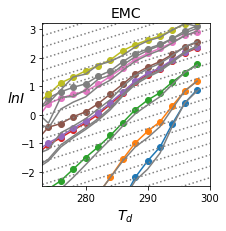

In [277]:
# plt.figure(figsize=(3,3))
# plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T/8),'o-')
# plt.legend(ds_group.quantiles.values, bbox_to_anchor=(1.01,0.61))
# # plt.xlim((287,315))
# for iim in np.arange(-25,-3,0.5):
#     plt.plot(np.array([265,315]),iim+0.068*np.array([265,315]),':', color='grey')
    
# plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T/8),'-', color='grey')
# plt.legend(ds_group2.quantiles.values, loc=3,bbox_to_anchor=(1.01,0))
# # plt.xlim((287,315))
# plt.title('EMC')
# plt.ylim((-1,6))
# plt.xlim((270,300))

plt.figure(figsize=(3,3))
plt.plot(ds_group.tdpsb,np.log(ds_group.pr_q.T/8),'o-')
plt.plot(ds_group2.tdpsb,np.log(ds_group2.pr_q.T/8),'-', color='grey')
# plt.xlim((287,315))
for iim in np.arange(-31,-13,0.4):
    plt.plot(np.array([270,315]),iim+0.068*np.array([270,315]),':', color='grey')
plt.title('EMC', fontsize=14)
plt.ylim((-2.5,3.2))
plt.xlim((273,300))
# plt.legend(ds_group.quantiles.values, loc=3,bbox_to_anchor=(1.01,0),fontsize=11)
plt.xlabel(r'$T_d$', fontsize=14)
plt.ylabel(r'$lnI$', rotation=0, fontsize=14)

# LOGISTIC REGRESSION

In [710]:
ds_allpr

<xarray.Dataset>
Dimensions:             (L: 35, M: 11, S: 237, lat: 11, lon: 14)
Coordinates:
  * lat                 (lat) float32 42.0 41.0 40.0 39.0 ... 34.0 33.0 32.0
  * lon                 (lon) float32 257.0 258.0 259.0 ... 268.0 269.0 270.0
  * L                   (L) float64 0.5 1.5 2.5 3.5 4.5 ... 31.5 32.5 33.5 34.5
  * M                   (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * S                   (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-31
Data variables:
    APCP_P1_L1_GLL0     (M, S, L, lat, lon) float32 0.0 0.0 0.0 ... 0.9 1.5
    TMP_P1_L103_GLL0    (M, S, L, lat, lon) float32 292.80002 292.2 ... 297.9
    DPT_P1_L103_GLL0    (M, S, L, lat, lon) float32 274.2 ... 289.44998
    CAPE_P1_2L108_GLL0  (M, S, L, lat, lon) float32 0.0 2.0 0.0 ... 166.0 188.0

In [778]:
week1lr_all = ds_allpr.sel(L=slice(1.5,7.5)) 
# week1lr_all = ds_allpr.sel(L=slice(8.5,14.5)) 
#I drop the first value, L=0.5,  but the target time of this is still the week starting at 0.
week1lr_all = week1lr_all.stack(Mll=('M','lat','lon')).compute()
print(week1lr_all)


<xarray.Dataset>
Dimensions:             (L: 7, Mll: 1694, S: 237)
Coordinates:
  * L                   (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S                   (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-31
  * Mll                 (Mll) MultiIndex
  - M                   (Mll) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
  - lat                 (Mll) float64 42.0 42.0 42.0 42.0 ... 41.0 40.0 40.0
  - lon                 (Mll) float64 257.0 258.0 259.0 ... 270.0 257.0 258.0
Data variables:
    APCP_P1_L1_GLL0     (S, L, Mll) float32 0.0 0.0 ... 0.79999995 0.59999996
    TMP_P1_L103_GLL0    (S, L, Mll) float32 295.7 295.2 296.0 ... 299.88 299.63
    DPT_P1_L103_GLL0    (S, L, Mll) float32 278.1 281.0 283.4 ... 293.15 292.58
    CAPE_P1_2L108_GLL0  (S, L, Mll) float32 76.0 507.0 528.0 ... 221.0 195.0


In [779]:
week1lr_all.rename({'APCP_P1_L1_GLL0':'pr','TMP_P1_L103_GLL0':'tas', 
                'DPT_P1_L103_GLL0':'tdps','CAPE_P1_2L108_GLL0':'cape'}, inplace=True)

<xarray.Dataset>
Dimensions:  (L: 7, Mll: 1694, S: 237)
Coordinates:
  * L        (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-24 2016-08-31
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, L, Mll) float32 0.0 0.0 0.1 ... 0.79999995 0.59999996
    tas      (S, L, Mll) float32 295.7 295.2 296.0 ... 299.69998 299.88 299.63
    tdps     (S, L, Mll) float32 278.1 281.0 283.4 ... 292.93 293.15 292.58
    cape     (S, L, Mll) float32 76.0 507.0 528.0 624.0 ... 176.0 221.0 195.0

In [780]:
week1lr_all

<xarray.Dataset>
Dimensions:  (L: 7, Mll: 1694, S: 237)
Coordinates:
  * L        (L) float64 1.5 2.5 3.5 4.5 5.5 6.5 7.5
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-24 2016-08-31
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, L, Mll) float32 0.0 0.0 0.1 ... 0.79999995 0.59999996
    tas      (S, L, Mll) float32 295.7 295.2 296.0 ... 299.69998 299.88 299.63
    tdps     (S, L, Mll) float32 278.1 281.0 283.4 ... 292.93 293.15 292.58
    cape     (S, L, Mll) float32 76.0 507.0 528.0 624.0 ... 176.0 221.0 195.0

In [781]:
week1lr = week1lr_all.mean(dim='L')

In [782]:
week1lr

<xarray.Dataset>
Dimensions:  (Mll: 1694, S: 237)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-24 2016-08-31
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
Data variables:
    pr       (S, Mll) float32 2.6285713 0.90000004 ... 0.47142857 0.12857142
    tas      (S, Mll) float32 295.0 295.32858 296.80002 ... 301.36285 300.89572
    tdps     (S, Mll) float32 276.97144 277.64285 ... 292.5957 291.56143
    cape     (S, Mll) float32 150.42857 337.57144 480.2857 ... 332.0 211.14285

# calculate the first target time for each weekly period. I add a 12 hour to use the center value as in INGRID, but really it starts at 00z

In [783]:
# here I calculate T, in the case of week 1 the first T values is S+1
week1lr.coords['T']=week1lr['S'].values+np.timedelta64(1,'D')+np.timedelta64(12,'h')
# week1lr
# in the case of week 2 the first value of T is S+8
# week1lr.coords['T']=week1lr['S'].values+np.timedelta64(8,'D')+np.timedelta64(12,'h')
week1lr
# re run faking a day more if it is wrong in ingrid

<xarray.Dataset>
Dimensions:  (Mll: 1694, S: 237, T: 237)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-02 1999-06-09 ... 2016-08-24 2016-08-31
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
Data variables:
    pr       (S, Mll) float32 2.6285713 0.90000004 ... 0.47142857 0.12857142
    tas      (S, Mll) float32 295.0 295.32858 296.80002 ... 301.36285 300.89572
    tdps     (S, Mll) float32 276.97144 277.64285 ... 292.5957 291.56143
    cape     (S, Mll) float32 150.42857 337.57144 480.2857 ... 332.0 211.14285

# GET NARR



In [784]:
import netCDF4
ds_Y =[]
for iy in np.arange(1999, 2017):
    print( iy)
    url = ('http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/('+
           np.str(iy)+
          ')/VALUES/time/(0000%201%20Jun)/(0000%2011%20Oct)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/')
    print(url)
    ds_temp = xr.open_dataset(url+'dods')
    ds_Y.append(ds_temp)
    del ds_temp
    
ds_NARRpr = xr.concat(ds_Y, dim='time')

1999
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(1999)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Oct)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2000
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2000)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Oct)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2001
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2001)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Oct)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2002
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/time/(2002)/VALUES/time/(0000%201%20Jun)/(0000%2011%20Oct)/RANGE/lat/32/42/RANGE/lon/257/270/RANGE/time/1/boxAverage/time/7/runningAverage/
2003
http://iridl.ldeo.columbia.edu/expert/home/.clepore/.NARR_ESRL_3hr_CONUS_1x1/.apcp/

In [785]:
ds_NARRpr

<xarray.Dataset>
Dimensions:  (lat: 11, lon: 14, time: 2268)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * time     (time) datetime64[ns] 1999-06-04T12:00:00 ... 2016-10-07T12:00:00
Data variables:
    apcp     (time, lat, lon) float32 0.029748198 0.17702778 ... 0.3292993
Attributes:
    Conventions:  IRIDL

## INGRID GIVE THE CENTER DAY VALUE as time index - so the first value (1-8) has date 4.5 I fix that. because (I think :) ) my T is the START time of the forecast period.

## Also for 8-14 i do the same.


In [786]:
ds_NARRpr.coords['time'] = ds_NARRpr.time-np.timedelta64(3,'D')

In [787]:
ds_NARRpr.time

<xarray.DataArray 'time' (time: 2268)>
array(['1999-06-01T12:00:00.000000000', '1999-06-02T12:00:00.000000000',
       '1999-06-03T12:00:00.000000000', ..., '2016-10-02T12:00:00.000000000',
       '2016-10-03T12:00:00.000000000', '2016-10-04T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1999-06-01T12:00:00 ... 2016-10-04T12:00:00

In [788]:
week1lr["T"]

<xarray.DataArray 'T' (T: 237)>
array(['1999-06-03T12:00:00.000000000', '1999-06-10T12:00:00.000000000',
       '1999-06-17T12:00:00.000000000', ..., '2016-08-18T12:00:00.000000000',
       '2016-08-25T12:00:00.000000000', '2016-09-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00

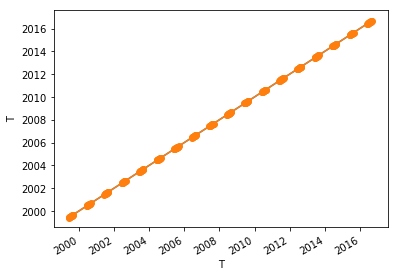

In [789]:
ds_NARRpr.time.plot()
week1lr["T"].plot(marker='o')

In [790]:
ds_NARRpr_T = ds_NARRpr.sel(time=week1lr["T"])

In [791]:
ds_NARRpr_T.time-ds_NARRpr_T['T']

<xarray.DataArray (T: 237)>
array([0, 0, 0, ..., 0, 0, 0], dtype='timedelta64[ns]')
Coordinates:
    time     (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00

In [792]:
week1lrStoT = week1lr
week1lrStoT['S'] = week1lrStoT['T'].values
week1lrStoT

<xarray.Dataset>
Dimensions:  (Mll: 1694, S: 237, T: 237)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
Data variables:
    pr       (S, Mll) float32 2.6285713 0.90000004 ... 0.47142857 0.12857142
    tas      (S, Mll) float32 295.0 295.32858 296.80002 ... 301.36285 300.89572
    tdps     (S, Mll) float32 276.97144 277.64285 ... 292.5957 291.56143
    cape     (S, Mll) float32 150.42857 337.57144 480.2857 ... 332.0 211.14285

(0.05, 0.45)

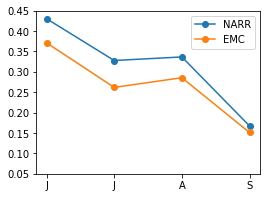

In [793]:
fig = plt.figure(figsize=(4,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']).groupby('time.month').mean(),'-o')
plt.plot(week1lrStoT.mean(dim='Mll').pr.groupby('S.month').mean()/8,'-o') 
plt.legend(('NARR','EMC'))
plt.xticks((0,1,2,3),('J','J','A','S'))
plt.ylim((0.05,0.45))

In [794]:
ds_NARRpr_T

<xarray.Dataset>
Dimensions:  (T: 237, lat: 11, lon: 14)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
    time     (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
  * T        (T) datetime64[ns] 1999-06-03T12:00:00 ... 2016-09-01T12:00:00
Data variables:
    apcp     (T, lat, lon) float32 0.037341055 0.17766069 ... 0.39427423
Attributes:
    Conventions:  IRIDL

Text(0, 1, '0.8')

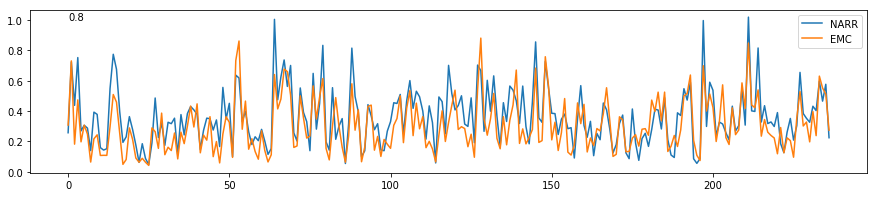

In [795]:
fig = plt.figure(figsize=(15,3))
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']))
plt.plot(week1lrStoT.mean(dim='Mll').pr/8) 
plt.legend(('NARR','EMC'))
plt.text(0,1,
         np.round(np.corrcoef(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lrStoT.mean(dim='Mll').pr/8)[0,1],2))

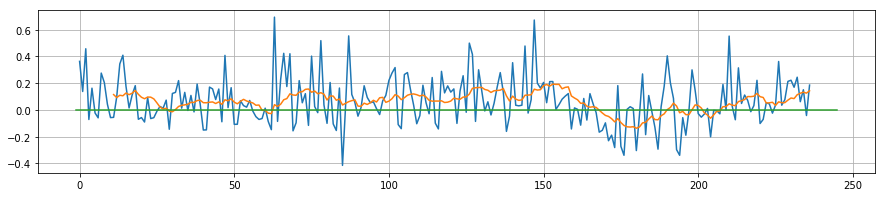

In [750]:
fig = plt.figure(figsize=(15,3))
plt.plot((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).values)-(week1lrStoT.mean(dim='Mll').pr.values/8))
plt.plot((ds_NARRpr_T.apcp.mean(dim=['lat','lon']).rolling(T=12).mean().values)-
         (week1lrStoT.mean(dim='Mll').pr.rolling(S=12).mean().values/8))

plt.plot([-1,245],[0,0])
plt.grid()

In [751]:
ds_NARRpr.rolling(time=9).me

AttributeError: 'DatasetRolling' object has no attribute 'me'

Text(0, 0.5, 'EMC')

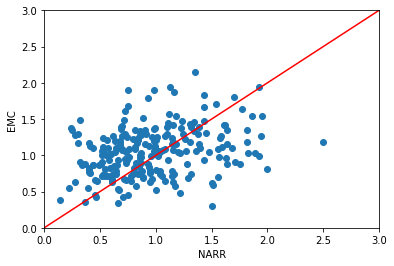

In [752]:
plt.plot(ds_NARRpr_T.apcp.quantile(q=0.95,dim=['lat','lon']),week1lr.quantile(q=0.95,dim='Mll').pr/8,'o') 
plt.xlim((0,3))
plt.ylim((0,3))
plt.plot([0,3],[0,3],'r-')
plt.xlabel('NARR')
plt.ylabel('EMC')

Text(0, 0.5, 'EMC')

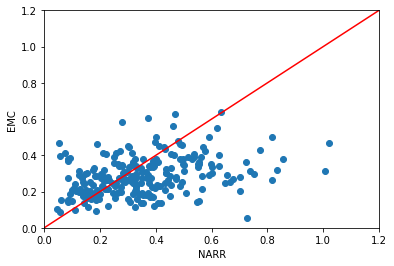

In [753]:
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').pr/8,'o') 
plt.xlim((0,1.2))
plt.ylim((0,1.2))
plt.plot([0,1.5],[0,1.5],'r-')
plt.xlabel('NARR')
plt.ylabel('EMC')

In [754]:
week1lr

<xarray.Dataset>
Dimensions:  (Mll: 1694, S: 237, T: 237)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
Data variables:
    pr       (S, Mll) float32 5.3 2.9142857 ... 0.017142856 0.028571427
    tas      (S, Mll) float32 297.3143 297.37143 297.87143 ... 300.78 299.57285
    tdps     (S, Mll) float32 286.2143 287.68573 ... 291.75714 291.79712
    cape     (S, Mll) float32 1328.2858 1557.2858 ... 323.85715 314.42856

In [755]:
ds_NARRpr_T

<xarray.Dataset>
Dimensions:  (T: 237, lat: 11, lon: 14)
Coordinates:
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * lat      (lat) float32 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
    time     (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * T        (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
Data variables:
    apcp     (T, lat, lon) float32 0.17986739 0.49238753 ... 0.6864523 0.5890786
Attributes:
    Conventions:  IRIDL

In [756]:
aa = ds_NARRpr_T.apcp.mean(dim=['lat','lon'])#quantile(q=85.)
quantile_threshold_mean  = aa.quantile(0.85)
quantile_threshold_all  = np.nanpercentile(ds_NARRpr_T.apcp.values.ravel(),85)

Text(0, 0.5, 'EMC-cape')

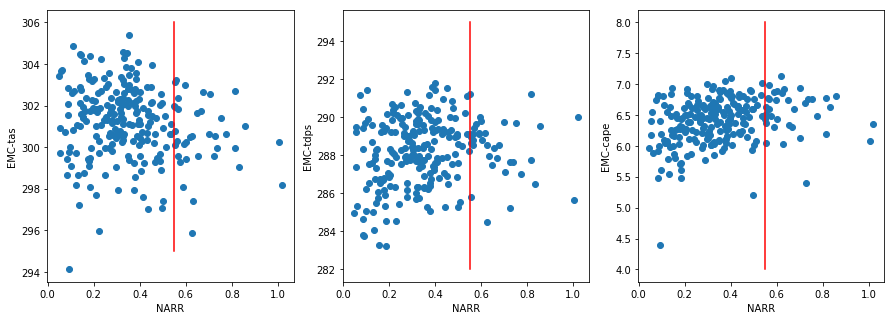

In [757]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tas,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[295, 306],'r-')
plt.xlabel('NARR')
plt.ylabel('EMC-tas')
ax = plt.subplot(1,3,2)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),week1lr.mean(dim='Mll').tdps,'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[282, 295],'r-')
plt.xlabel('NARR')
plt.ylabel('EMC-tdps')
ax = plt.subplot(1,3,3)
plt.plot(ds_NARRpr_T.apcp.mean(dim=['lat','lon']),np.log(week1lr.mean(dim='Mll').cape),'o') 
plt.plot([quantile_threshold_mean.values,quantile_threshold_mean.values],[4, 8],'r-')
plt.xlabel('NARR')
plt.ylabel('EMC-cape')

# I have to create a pandas dataframe to do logistic regression so i will manipulate some names and coords

In [758]:
week1lr

<xarray.Dataset>
Dimensions:  (Mll: 1694, S: 237, T: 237)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * Mll      (Mll) MultiIndex
  - M        (Mll) int64 0 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0 0 0
  - lat      (Mll) float64 42.0 42.0 42.0 42.0 42.0 ... 41.0 41.0 41.0 40.0 40.0
  - lon      (Mll) float64 257.0 258.0 259.0 260.0 ... 269.0 270.0 257.0 258.0
  * T        (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
Data variables:
    pr       (S, Mll) float32 5.3 2.9142857 ... 0.017142856 0.028571427
    tas      (S, Mll) float32 297.3143 297.37143 297.87143 ... 300.78 299.57285
    tdps     (S, Mll) float32 286.2143 287.68573 ... 291.75714 291.79712
    cape     (S, Mll) float32 1328.2858 1557.2858 ... 323.85715 314.42856

In [759]:
week1lr_us = week1lr.unstack()


In [760]:
week1lr_us = week1lr_us.drop('T')
week1lr_us

<xarray.Dataset>
Dimensions:  (M: 11, S: 237, lat: 11, lon: 14)
Coordinates:
  * S        (S) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * lat      (lat) float64 42.0 41.0 40.0 39.0 38.0 ... 36.0 35.0 34.0 33.0 32.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
Data variables:
    pr       (S, M, lat, lon) float32 5.3 2.9142857 ... 0.017142856 0.028571427
    tas      (S, M, lat, lon) float32 297.3143 297.37143 ... 300.78 299.57285
    tdps     (S, M, lat, lon) float32 286.2143 287.68573 ... 291.75714 291.79712
    cape     (S, M, lat, lon) float32 1328.2858 1557.2858 ... 314.42856

In [761]:
week1lr_us.rename({'S':'T'}, inplace=True)

<xarray.Dataset>
Dimensions:  (M: 11, T: 237, lat: 11, lon: 14)
Coordinates:
  * T        (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9 10
  * lat      (lat) float64 42.0 41.0 40.0 39.0 38.0 ... 36.0 35.0 34.0 33.0 32.0
  * lon      (lon) float64 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
Data variables:
    pr       (T, M, lat, lon) float32 5.3 2.9142857 ... 0.017142856 0.028571427
    tas      (T, M, lat, lon) float32 297.3143 297.37143 ... 300.78 299.57285
    tdps     (T, M, lat, lon) float32 286.2143 287.68573 ... 291.75714 291.79712
    cape     (T, M, lat, lon) float32 1328.2858 1557.2858 ... 314.42856

In [762]:
ds_merged = ds_NARRpr_T.drop('time')

ds_merged = ds_merged.merge(week1lr_us)
ds_merged

<xarray.Dataset>
Dimensions:  (M: 11, T: 237, lat: 11, lon: 14)
Coordinates:
  * lat      (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 38.0 39.0 40.0 41.0 42.0
  * lon      (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * T        (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * M        (M) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    apcp     (T, lat, lon) float32 0.17986739 0.49238753 ... 0.6864523 0.5890786
    pr       (T, M, lat, lon) float32 0.0 0.0 0.0 ... 5.702857 4.9714284
    tas      (T, M, lat, lon) float32 305.17142 304.35715 ... 294.6614 294.79715
    tdps     (T, M, lat, lon) float32 281.95712 283.9 ... 290.40714 290.28998
    cape     (T, M, lat, lon) float32 135.42857 183.14285 ... 406.0 327.57144
Attributes:
    Conventions:  IRIDL

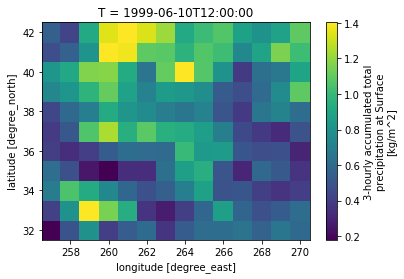

In [763]:
ds_merged.apcp[0].plot()

# let's repeat the observation 11 times, one per ensemble members

In [764]:
dstemp = ds_merged.apcp.expand_dims(dim='M',axis=1).to_dataset(name='apcp')

In [765]:
ds_merged['apcp_rep']=(('T','M','lat','lon'), np.repeat(dstemp.apcp,11,axis=1))

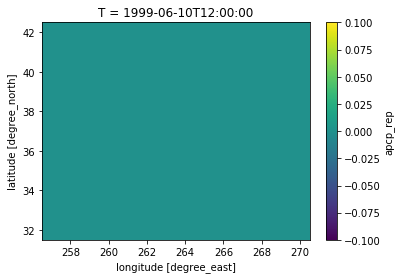

In [766]:
(ds_merged.apcp_rep[0,0]-ds_merged.apcp_rep[0,10]).plot()

In [767]:
ds_merged

<xarray.Dataset>
Dimensions:   (M: 11, T: 237, lat: 11, lon: 14)
Coordinates:
  * lat       (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * T         (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
  * M         (M) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    apcp      (T, lat, lon) float32 0.17986739 0.49238753 ... 0.5890786
    pr        (T, M, lat, lon) float32 0.0 0.0 0.0 ... 5.702857 4.9714284
    tas       (T, M, lat, lon) float32 305.17142 304.35715 ... 294.79715
    tdps      (T, M, lat, lon) float32 281.95712 283.9 ... 290.40714 290.28998
    cape      (T, M, lat, lon) float32 135.42857 183.14285 ... 406.0 327.57144
    apcp_rep  (T, M, lat, lon) float32 0.17986739 0.49238753 ... 0.5890786
Attributes:
    Conventions:  IRIDL

In [768]:
ds_merged.to_netcdf('ds_merged_EMC_allM.nc')
# ds_merged.to_netcdf('ds_merged_EMC_allM_week2.nc')

# I actually want to do the analysis on the ensemble mean

In [769]:
ds_merged = ds_merged.mean(dim='M')

In [770]:
ds_merged_mean = ds_merged.mean(dim=['lat','lon'])

In [771]:
ds_merged.to_netcdf('ds_merged_EMC.nc')
ds_merged_mean.to_netcdf('ds_merged_mean_EMC.nc')
# ds_merged.to_netcdf('ds_merged_EMC_week2.nc')
# ds_merged_mean.to_netcdf('ds_merged_mean_EMC_week2.nc')

In [772]:
ds_merged

<xarray.Dataset>
Dimensions:   (T: 237, lat: 11, lon: 14)
Coordinates:
  * lat       (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * T         (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
Data variables:
    apcp      (T, lat, lon) float32 0.17986739 0.49238753 ... 0.5890786
    pr        (T, lat, lon) float32 0.35545453 0.54415584 ... 4.7198706
    tas       (T, lat, lon) float32 303.2553 302.61887 ... 293.76932 293.98676
    tdps      (T, lat, lon) float32 281.26624 283.64157 ... 287.2908 287.24127
    cape      (T, lat, lon) float32 435.35062 549.948 ... 411.8961 384.88312
    apcp_rep  (T, lat, lon) float32 0.17986739 0.4923876 ... 0.58907855

In [773]:
df_merged = ds_merged[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged = df_merged.reset_index()
print(df_merged.shape)
df_merged.head(5)

(36498, 8)


,T,lat,lon,apcp_rep,pr,tas,tdps,cape
0,1999-06-10 12:00:00,32.0,257.0,0.179867,0.355455,303.255310,281.266235,435.350616
1,1999-06-10 12:00:00,32.0,258.0,0.492388,0.544156,302.618866,283.641571,549.947998
2,1999-06-10 12:00:00,32.0,259.0,0.791331,0.419740,302.704681,284.661041,513.207764
3,1999-06-10 12:00:00,32.0,260.0,0.399819,0.847792,302.640106,285.740265,507.753235
4,1999-06-10 12:00:00,32.0,261.0,0.535066,0.996623,302.357300,287.135071,544.805176


In [774]:
df_merged_mean = ds_merged_mean[['apcp_rep','pr','tas','tdps','cape']].to_dataframe()
df_merged_mean = df_merged_mean.reset_index()

In [775]:
import bottleneck

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])

def covariance_gufunc(x, y):
    return ((x - x.mean(axis=-1, keepdims=True))
            * (y - y.mean(axis=-1, keepdims=True))).mean(axis=-1)

def pearson_correlation_gufunc(x, y):
    return covariance_gufunc(x, y) / (x.std(axis=-1) * y.std(axis=-1))

def spearman_correlation_gufunc(x, y):
    x_ranks = bottleneck.rankdata(x, axis=-1)
    y_ranks = bottleneck.rankdata(y, axis=-1)
    return pearson_correlation_gufunc(x_ranks, y_ranks)

def spearman_correlation(x, y, dim):
    return xr.apply_ufunc(
        spearman_correlation_gufunc, x, y,
        input_core_dims=[[dim], [dim]],
        dask='parallelized',
        output_dtypes=[float])


In [776]:
ds_merged

<xarray.Dataset>
Dimensions:   (T: 237, lat: 11, lon: 14)
Coordinates:
  * lat       (lat) float64 32.0 33.0 34.0 35.0 36.0 ... 39.0 40.0 41.0 42.0
  * lon       (lon) float32 257.0 258.0 259.0 260.0 ... 267.0 268.0 269.0 270.0
  * T         (T) datetime64[ns] 1999-06-10T12:00:00 ... 2016-09-08T12:00:00
Data variables:
    apcp      (T, lat, lon) float32 0.17986739 0.49238753 ... 0.5890786
    pr        (T, lat, lon) float32 0.35545453 0.54415584 ... 4.7198706
    tas       (T, lat, lon) float32 303.2553 302.61887 ... 293.76932 293.98676
    tdps      (T, lat, lon) float32 281.26624 283.64157 ... 287.2908 287.24127
    cape      (T, lat, lon) float32 435.35062 549.948 ... 411.8961 384.88312
    apcp_rep  (T, lat, lon) float32 0.17986739 0.4923876 ... 0.58907855

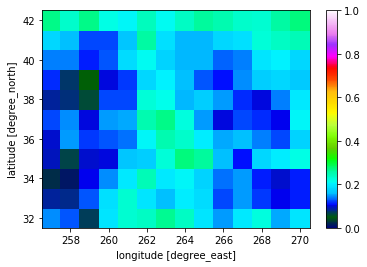

In [777]:
spearman_correlation(ds_merged.apcp_rep, ds_merged.pr/8.,'T').plot(vmin=0,vmax=1, cmap='gist_ncar')

# fix units

In [600]:
df_merged['pr']= df_merged['pr']/8 # 3 hourly and not daily
df_merged[0:17500].tail(5)

,T,lat,lon,apcp_rep,pr,tas,tdps,cape
17495,2007-08-02 12:00:00,38.0,266.0,0.007340,0.009740,301.376099,292.367554,505.870087
17496,2007-08-02 12:00:00,38.0,267.0,0.042064,0.019481,301.947937,290.753265,333.402588
17497,2007-08-02 12:00:00,38.0,268.0,0.033205,0.013474,302.254547,290.177948,265.116913
17498,2007-08-02 12:00:00,38.0,269.0,0.098342,0.006494,302.170929,290.101318,251.311676
17499,2007-08-02 12:00:00,38.0,270.0,0.130875,0.016721,303.693390,289.093506,236.519470


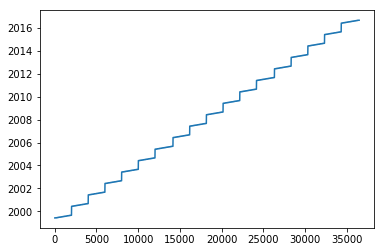

In [601]:
df_merged['T'].plot()

In [602]:
df_merged_mean['pr']= df_merged_mean['pr']/8 # 3 hourly and not daily
df_merged_mean.head(5)

,T,apcp_rep,pr,tas,tdps,cape
0,1999-06-03 12:00:00,0.256931,0.307680,299.555054,287.567566,1081.592529
1,1999-06-10 12:00:00,0.723767,0.731022,297.214691,288.922302,653.793030
2,1999-06-17 12:00:00,0.437628,0.181610,297.498871,286.428131,542.377014
3,1999-06-24 12:00:00,0.752838,0.473693,300.283844,290.532379,1205.066406
4,1999-07-01 12:00:00,0.269029,0.196849,301.867706,290.326385,1007.021423


In [603]:
df_merged['y']=df_merged.apcp_rep>=quantile_threshold_all
df_merged_mean['y']=df_merged_mean.apcp_rep>=quantile_threshold_mean.values


In [604]:
df_merged['logcape'] = np.log(df_merged['cape'])
df_merged_mean['logcape'] = np.log(df_merged_mean['cape'])
df_merged.replace([np.inf, -np.inf], np.nan, inplace=True)
df_merged = df_merged.dropna()

In [605]:
X = df_merged[['apcp_rep','pr','tas','tdps','cape','logcape','T']]
y = df_merged.loc[:, df_merged.columns == 'y']
X['const']=1

Xm = df_merged_mean[['apcp_rep','pr','tas','tdps','cape','logcape','T']]
ym = df_merged_mean.loc[:, df_merged_mean.columns == 'y']
Xm['const']=1

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.metrics import log_loss

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [608]:
#     which_0 = where_0.dropna().sample(NN.values*2).index    
#     XX0 = X_train.loc[which_0]
#     XX1 = X_train.loc[where_1.dropna().index]
#     YY0 = where_0.dropna().loc[which_0]
#     YY1 = where_1.dropna()


In [651]:
def random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
        
    AA = ((REAL-PREDICTION_A.values)**2)**(1/2.)
    BB = ((REAL-PREDICTION_B.values)**2)**(1/2.)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1.3, 1))
#     plt.yscale('symlog')

In [653]:
def random_walk_mike_map(TIMEINDEX, REAL, PREDICTION_A, PREDICTION_B,firstmodel,secondmodel):
    if len(y_trainT.shape)==2:
        REAL = REAL.values[:,0]
    elif len(y_trainT.shape)==1:
        REAL = REAL.values[:]
    df_temp = TIMEINDEX
    df_temp['REAL']= REAL
    df_temp['PA'] = PREDICTION_A.values
    df_temp['PB'] = PREDICTION_B.values
    AA=np.zeros((pd.unique(df_temp['T']).shape))
    BB=np.zeros((pd.unique(df_temp['T']).shape))
    for ik,(k,gp) in enumerate(df_temp.groupby('T')):
       
        AA[ik] = np.sum((gp.REAL.values-gp.PA.values)**2)
        BB[ik] = np.sum((gp.REAL.values-gp.PB.values)**2)
    better_AA = AA<BB
    better_AA = better_AA.astype(int)
    better_AA[better_AA==0]=-1
    plt.plot(np.cumsum(better_AA), label=secondmodel)
    plt.title(firstmodel)
    plt.legend( bbox_to_anchor=(1.1, 1))
    #     plt.yscale('symlog')

In [641]:
y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(0.85).apcp_rep).astype(int)
print( len(y_trainT.shape))

1


1.1367290019989014 0.7137482076883317
Optimization terminated successfully.
         Current function value: 0.159185
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.359     0.067     0.113       913

avg / total      0.923     0.947     0.930     18249

[[17227   109]
 [  852    61]]
0.5302626055676328
Optimization terminated successfully.
         Current function value: 0.193488
         Iterations 7
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#inde

Optimization terminated successfully.
         Current function value: 0.187641
         Iterations 7
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.185960
         Iterations 8
             precision    recall  f1-score   support

          0      0.950     1.000     0.974     17336
          1      0.000     0.000     0.000       913

avg / total      0.902     0.950     0.926     18249

[[17336     0]
 [  913     0]]
0.5


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Optimization terminated successfully.
         Current function value: 0.159065
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.360     0.069     0.116       913

avg / total      0.923     0.947     0.930     18249

[[17224   112]
 [  850    63]]
0.5312713706695725
Optimization terminated successfully.
         Current function value: 0.157291
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.362     0.064     0.108       913

avg / total      0.923     0.948     0.930     18249

[[17234   102]
 [  855    58]]
0.5288215622063704
Optimization terminated successfully.
         Current function value: 0.156574
         Iterations 8
             precision    recall  f1-score   support

          0      0.953     0.994     0.973     17336
          1      0.375     0.072     0.121       913

avg

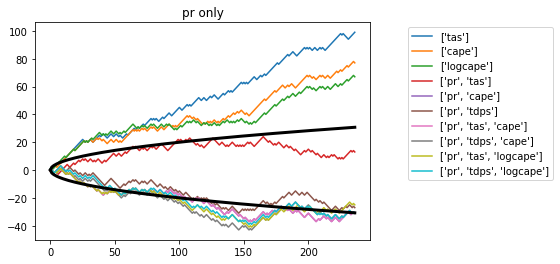

In [656]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)

# y_trainT =  y_trainT.astype(int)

# X_trainT = X[0:int(X.shape[0]/2)]
# y_trainT = y[0:int(X.shape[0]/2)].astype(int)
# X_testT = X[int(X.shape[0]/2):]
# y_testT = y[int(X.shape[0]/2):].astype(int)

print(X_trainT.quantile(0.95).apcp_rep,quantile_threshold_all)

y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(0.95).apcp_rep).astype(int)
y_testT =(X_testT.apcp_rep>=X_testT.quantile(0.95).apcp_rep).astype(int)

# whichytest = y_testT.index
# df_merged_test = df_merged.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T','lat','lon']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
# 

# y_testT = y_testT.astype(int)

REAL = y_testT

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train,missing = 'drop')
result1=logit_model.fit(missing = 'drop')
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
# print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike_map(X_testT[['T']],REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

NN = len(pd.unique(X_testT[['T']].values[:,0]))
plt.plot(np.arange(0,NN),2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,NN),-2.*(np.arange(0,NN))**(1/2.),'k-',lw=3)

['pr']
[[3.43987819]]
[-3.13691696]
liblinear
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3439
0.5632873234697883


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


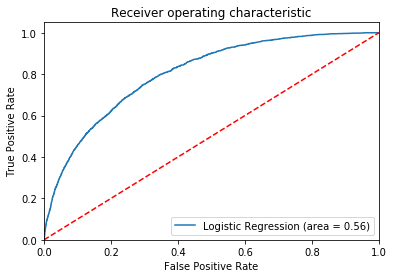

['pr', 'tas']
0
[[ 3.3915885  -0.01047124]]
[0.02319605]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3441
0.5626868956001474


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


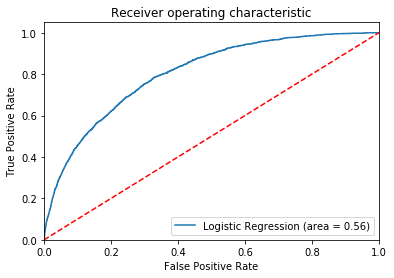

['pr', 'tdps']
0
[[ 3.46466301 -0.01046647]]
[-0.11380592]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3447
0.5633139166384875


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


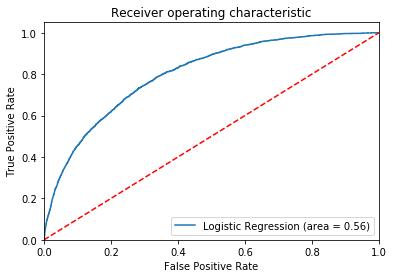

['pr', 'cape']
0
[[3.15798993e+00 7.17860445e-04]]
[-3.53863761]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3396
0.56715701184543


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


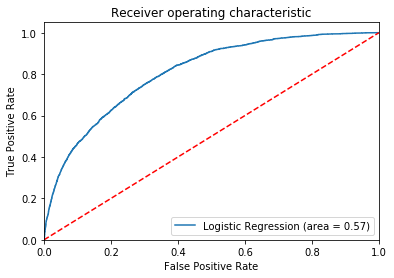

['pr', 'logcape']
0
[[3.19255448 0.48800558]]
[-6.17696601]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3384
0.5661401842320353


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


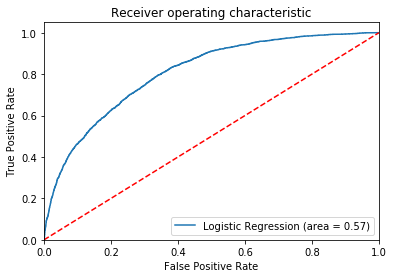

['pr', 'tas', 'cape']
0
[[ 3.10805138e+00 -1.19660476e-02  7.52307151e-04]]
[0.04211291]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3397
0.5655772246927343


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


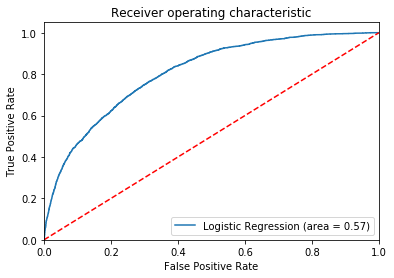

['pr', 'tdps', 'cape']
0
[[ 3.18392479e+00 -1.22768048e-02  7.82510421e-04]]
[-0.04158653]
Accuracy of logistic regression classifier on test set: 0.86
log loss: 0.3397
0.5671542930550197


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


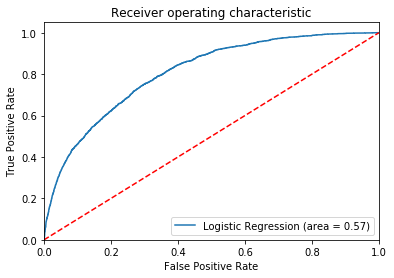

In [474]:


y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [396]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)

# whichytest = y_testT.index
# df_merged_test = df_merged_mean.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_mean.values
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

Optimization terminated successfully.
         Current function value: 0.169433
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.589     
Dependent Variable: y                AIC:              43.9861   
Date:               2018-12-11 15:18 BIC:              49.5275   
No. Observations:   118              Log-Likelihood:   -19.993   
Df Model:           1                LL-Null:          -48.649   
Df Residuals:       116              LLR p-value:      3.7191e-14
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const    -8.8198     1.9977   -4.4150   0.0000   -12.7352   -4.9044
pr       17.7939     4.3477    4.0927   0.0000     9.2725 

                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.619     
Dependent Variable: y                AIC:              45.0334   
Date:               2018-12-11 15:18 BIC:              56.1162   
No. Observations:   118              Log-Likelihood:   -18.517   
Df Model:           3                LL-Null:          -48.649   
Df Residuals:       114              LLR p-value:      5.1610e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
------------------------------------------------------------------
            Coef.    Std.Err.     z     P>|z|     [0.025    0.975]
------------------------------------------------------------------
const     -123.9128  102.0465  -1.2143  0.2246  -323.9203  76.0947
pr          21.8067    6.0279   3.6176  0.0003     9.9923  33.6212
tas          0.3724    0.3337   1.1159  0.2644    -0.2816   1.0263
cape         0.0023    0.0018 

0.5589172273874283 0.7137482076883317
Optimization terminated successfully.
         Current function value: 0.158353
         Iterations 9
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.629     
Dependent Variable: apcp_rep         AIC:              41.3712   
Date:               2018-12-21 13:43 BIC:              46.9126   
No. Observations:   118              Log-Likelihood:   -18.686   
Df Model:           1                LL-Null:          -50.397   
Df Residuals:       116              LLR p-value:      1.6676e-15
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
         Coef.     Std.Err.      z      P>|z|     [0.025     0.975]
-------------------------------------------------------------------
const   -10.2769     2.5223   -4.0744   0.0000   -15.2205   -5.3332
pr       18.6057    

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


                        Results: Logit
Model:              Logit            Pseudo R-squared: 0.043   
Dependent Variable: apcp_rep         AIC:              100.4447
Date:               2018-12-21 13:43 BIC:              105.9860
No. Observations:   118              Log-Likelihood:   -48.222 
Df Model:           1                LL-Null:          -50.397 
Df Residuals:       116              LLR p-value:      0.037020
Converged:          1.0000           Scale:            1.0000  
No. Iterations:     7.0000                                     
----------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|    [0.025    0.975]
----------------------------------------------------------------
const      -9.6976    4.2454  -2.2843  0.0224  -18.0183  -1.3769
logcape     1.2535    0.6567   1.9088  0.0563   -0.0336   2.5406

             precision    recall  f1-score   support

          0      0.849     1.000     0.918       101
          1     

Optimization terminated successfully.
         Current function value: 0.157682
         Iterations 10
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.631     
Dependent Variable: apcp_rep         AIC:              45.2130   
Date:               2018-12-21 13:43 BIC:              56.2958   
No. Observations:   118              Log-Likelihood:   -18.607   
Df Model:           3                LL-Null:          -50.397   
Df Residuals:       114              LLR p-value:      1.0088e-13
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     10.0000                                      
------------------------------------------------------------------
            Coef.   Std.Err.     z     P>|z|     [0.025    0.975] 
------------------------------------------------------------------
const       0.8863  108.7022   0.0082  0.9935  -212.1661  213.9387
pr         18.9591    5.2588   3.6052  0.0003     8.6521   29

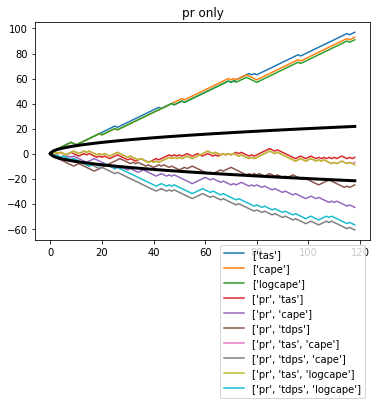

In [648]:
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report
X_trainT, X_testT, y_trainT, y_testT = train_test_split(Xm, ym, test_size=0.5, random_state=0)
y_trainT = y_trainT.astype(int)
y_testT = y_testT.astype(int)


# X_trainT = Xm[int(Xm.shape[0]/2):]
# y_trainT = ym[int(Xm.shape[0]/2):].astype(int)
# X_testT = Xm[0:int(Xm.shape[0]/2)]
# y_testT = ym[0:int(Xm.shape[0]/2)].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0]/2)]
# y_trainT = ym[0:int(Xm.shape[0]/2)].astype(int)
# X_testT = Xm[int(Xm.shape[0]/2):]
# y_testT = ym[int(Xm.shape[0]/2):].astype(int)

# X_trainT = Xm[0:int(Xm.shape[0])]
# y_trainT = ym[0:int(Xm.shape[0])].astype(int)
# X_testT = Xm[0:int(Xm.shape[0])]
# y_testT = ym[0:int(Xm.shape[0])].astype(int)

# whichytest = y_testT.index
# df_merged_test = df_merged.loc[whichytest]
# ds_merged_test = df_merged_test.set_index(['M','T','lat','lon']).to_xarray().mean('M')
# del df_merged_test
# df_merged_test = ds_merged_test.to_dataframe()
# df_merged_test = df_merged_test.reset_index()
# df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
# X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
# y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
# X_testT['const']=1
# y_testT = y_testT.loc[X_testT.dropna().index]
# X_testT = X_testT.dropna()
y_testT = y_testT.astype(int)


print(X_trainT.quantile(0.85).apcp_rep,quantile_threshold_all)

y_trainT=(X_trainT.apcp_rep>=X_trainT.quantile(0.85).apcp_rep).astype(int)
y_testT =(X_testT.apcp_rep>=X_testT.quantile(0.85).apcp_rep).astype(int)

REAL = y_testT

varname = ['const','pr']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
model = LogisticRegression(C=1e8)

result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))

print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_A = predictions*1.

varname = ['const','tas']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.
plt.figure()
random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','cape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname = ['const','logcape']
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train,missing = 'drop')
result1=logit_model.fit(missing = 'drop')
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','cape'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps'    ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))

PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','cape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tas','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])

varname=['const','pr','tdps','logcape'  ]
X_train = X_trainT[varname]
X_test = X_testT[varname]

logit_model=sm.Logit(y_trainT,X_train)
result1=logit_model.fit()
print(result1.summary2())

predictions = result1.predict(X_test)
# print(predictions)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# ytest_nominal = [ "Up" if x == 0 else "Down" for x in y_testT]
# print(ytest_nominal)
print(classification_report(y_testT, predictions_nominal, digits=3))
print(metrics.confusion_matrix(y_testT, predictions_nominal))
print(roc_auc_score(y_testT, predictions_nominal))
PREDICTION_B = predictions*1.

random_walk_mike(REAL, PREDICTION_A, PREDICTION_B,'pr only',varname[1:])
plt.plot(np.arange(0,len(REAL.values[:])),2.*(np.arange(0,len(REAL.values[:])))**(1/2.),'k-',lw=3)
plt.plot(np.arange(0,len(REAL.values[:])),-2.*(np.arange(0,len(REAL.values[:])))**(1/2.),'k-',lw=3)

In [479]:
Xm.shape

(237, 6)

['pr']
[[17.79063992]]
[-8.81824259]
liblinear
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3368
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


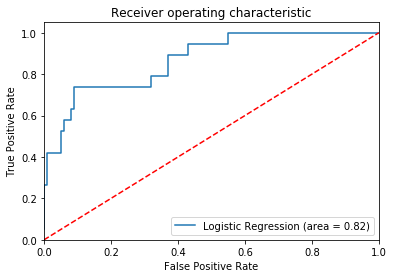

['pr', 'tas']
0
[[17.14695178 -0.02897474]]
[0.15937179]
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3337
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


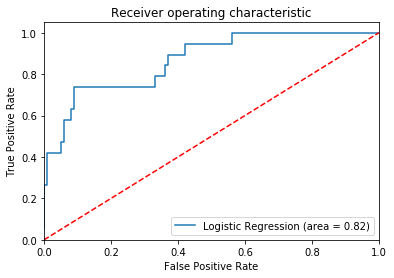

['pr', 'tdps']
0
[[17.52140899 -0.0296823 ]]
[-0.15557522]
Accuracy of logistic regression classifier on test set: 0.87
log loss: 0.3306
0.818421052631579


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


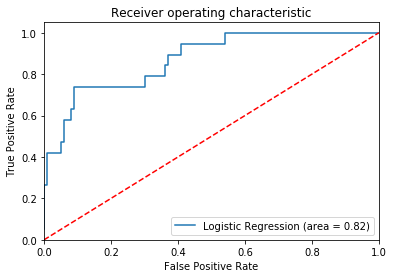

['pr', 'cape']
0
[[1.74136478e+01 2.07850332e-03]]
[-10.08789065]
Accuracy of logistic regression classifier on test set: 0.88
log loss: 0.3404
0.8234210526315789


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


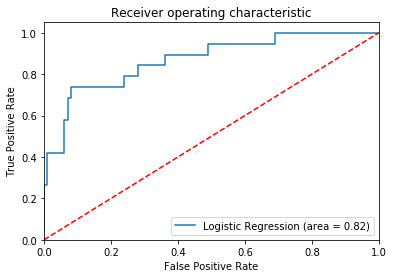

['pr', 'logcape']
0
[[18.23426348  1.5658396 ]]
[-19.17813596]
Accuracy of logistic regression classifier on test set: 0.88
log loss: 0.3508
0.8234210526315789


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


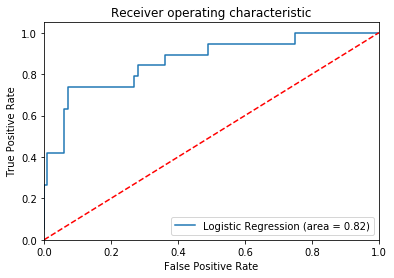

['pr', 'tas', 'cape']
0
[[ 1.70275760e+01 -3.38356771e-02  2.11181781e-03]]
[0.20157894]
Accuracy of logistic regression classifier on test set: 0.89
log loss: 0.3396
0.8284210526315791


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


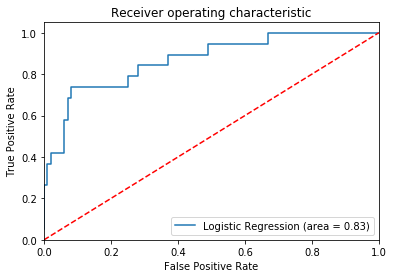

['pr', 'tdps', 'cape']
0
[[ 1.74723010e+01 -3.61197403e-02  2.26335296e-03]]
[0.14601483]
Accuracy of logistic regression classifier on test set: 0.89
log loss: 0.3364
0.8284210526315791


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


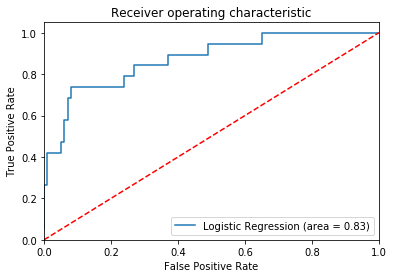

In [397]:


y_test = y_testT
y_train  =y_trainT


varname=['pr' ]   
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
# logreg = LogisticRegression()
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.coef_)
print(logreg.intercept_)
print(logreg.solver)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas'    ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','logcape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

varname=['pr','tdps','cape'   ]  
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)

print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([2.92578916, 0.        , 0.73144729, 1.46289458, 2.19434187,
        0.73144729, 0.73144729, 0.        , 0.73144729, 1.46289458]),
 array([0.01629368, 0.10743719, 0.19858069, 0.28972419, 0.38086769,
        0.47201119, 0.56315469, 0.65429819, 0.74544169, 0.83658519,
        0.92772869]),
 <a list of 1 Patch objects>)

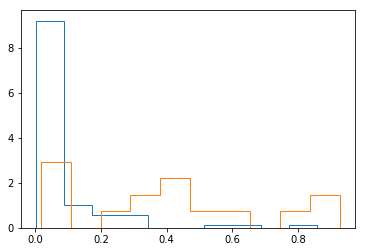

In [331]:
plt.hist(logreg.predict_proba(X_test)[:,1][np.asarray(y_test==0).squeeze()], histtype='step', normed=True)
plt.hist(logreg.predict_proba(X_test)[:,1][np.asarray(y_test==1).squeeze()], histtype='step', normed=True)

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, wa

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning

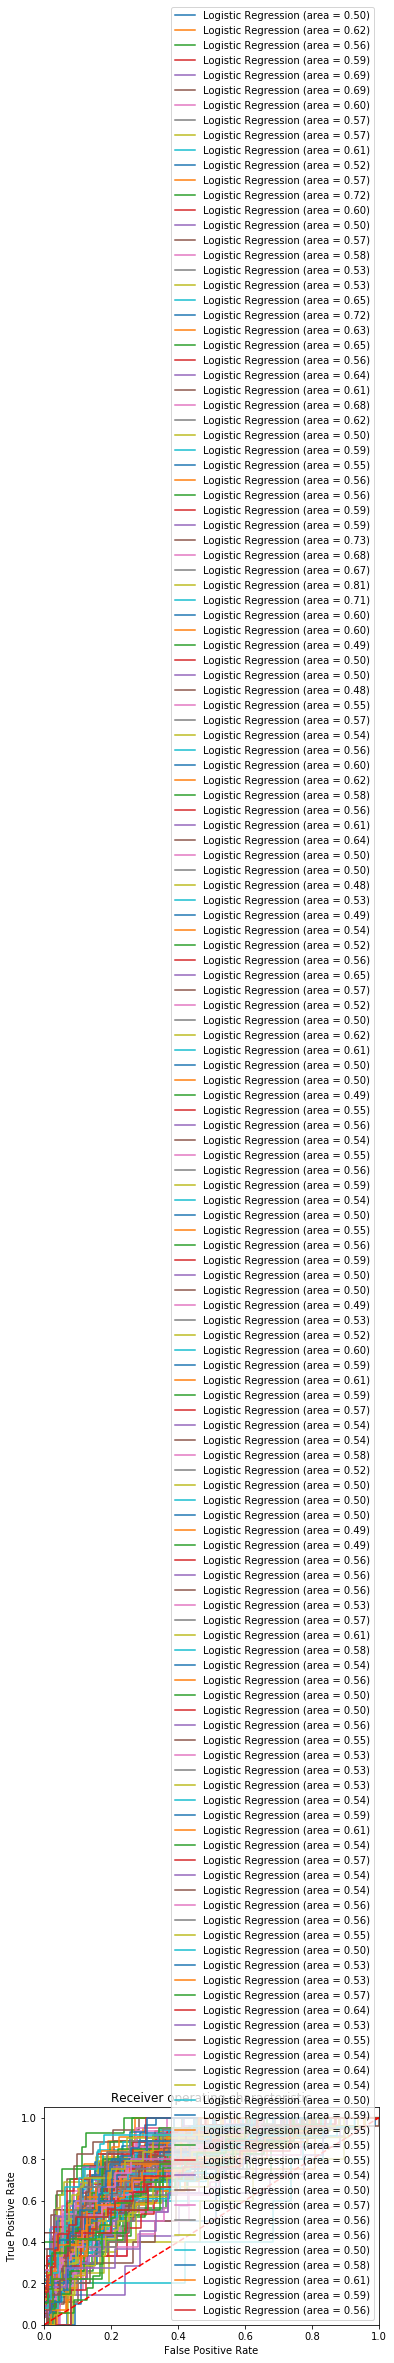

In [332]:
coefvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
aucvalues = np.zeros((len(np.arange(32, 43)),len(np.arange(257, 271))))
plt.figure()

for ilat, latx in enumerate(np.arange(32, 43)):
    for ilon, lonx in enumerate(np.arange(257, 271)):
        df_temp = df_merged[(df_merged.lat==latx)&(df_merged.lon==lonx)].dropna()
        
        X = df_temp[['pr','tas','tdps']]
        y = df_temp.loc[:, df_temp.columns == 'y']
        X['const']=1
        X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.5, random_state=0)
        y_train  =y_trainT
        
        
#         whichytest = y_testT.index
#         df_merged_test = df_temp.loc[whichytest]
#         ds_merged_test = df_merged_test.set_index(['M','T']).to_xarray().mean('M')
#         del df_merged_test
#         df_merged_test = ds_merged_test.to_dataframe()
#         df_merged_test = df_merged_test.reset_index()
#         df_merged_test['y']=df_merged_test.apcp_rep>=quantile_threshold_all
#         X_testT = df_merged_test[['pr','tas','tdps','cape','logcape']]
#         y_testT = df_merged_test.loc[:, df_merged_test.columns == 'y']
#         X_testT['const']=1
#         y_testT = y_testT.loc[X_testT.dropna().index]
#         X_testT = X_testT.dropna()
        y_testT = y_testT.astype(int)
        y_test = y_testT*1.



        varname=['pr' ]   
        X_train = X_trainT[varname]
        X_test = X_testT[varname]
        # logreg = LogisticRegression()
        logreg = LogisticRegression(C=1e8)
        logreg.fit(X_train, y_train)
        logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
        coefvalues[ilat,ilon]= logreg.coef_
        aucvalues[ilat,ilon]= logit_roc_auc
#         print(logreg.intercept_)
#         print(logreg.solver)
#         y_pred = logreg.predict(X_test)
#         print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
#         print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 

#         logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
#         print(logit_roc_auc)
        fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")





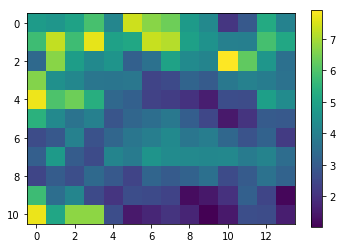

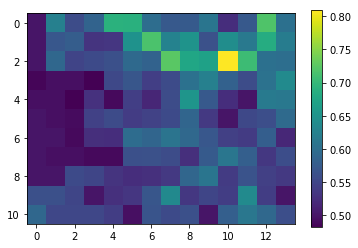

In [333]:
plt.figure()
plt.imshow(coefvalues)
plt.colorbar()
plt.figure()
plt.imshow(aucvalues)
plt.colorbar()

In [491]:
import numpy as np
from scipy.stats import chi2
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

def likelihood_ratio_test(features_alternate, labels, lr_model, features_null=None):
    """
    Compute the likelihood ratio test for a model trained on the set of features in
    `features_alternate` vs a null model.  If `features_null` is not defined, then
    the null model simply uses the intercept (class probabilities).  Note that
    `features_null` must be a subset of `features_alternative` -- it can not contain
    features that are not in `features_alternate`.
    Returns the p-value, which can be used to accept or reject the null hypothesis.
    """
    labels = np.array(labels)
    features_alternate = np.array(features_alternate)
    
#     if features_null!=None:
#         features_null = np.array(features_null)
        
#         if features_null.shape[1] >= features_alternate.shape[1]:
#             raise ValueError, "Alternate features must have more features than null features"
        
    lr_model.fit(features_null, labels)
    print(lr_model.coef_)
    null_prob = lr_model.predict_proba(features_null)[:, 1]
    df = features_alternate.shape[1] - features_null.shape[1]
    print(df)
#     else:
#         null_prob = sum(labels) / float(labels.shape[0]) * \
#                     np.ones(labels.shape)
#         df = features_alternate.shape[1]
    
    lr_model.fit(features_alternate, labels)
    alt_prob = lr_model.predict_proba(features_alternate)
    print(lr_model.coef_)
    alt_log_likelihood = -log_loss(labels,
                                   alt_prob,
                                   normalize=False)
    null_log_likelihood = -log_loss(labels,
                                    null_prob,
                                    normalize=False)
    print(alt_log_likelihood,null_log_likelihood)
    G = 2 * (alt_log_likelihood - null_log_likelihood)
    p_value = chi2.sf(G, df)

    return p_value

In [462]:
def plot_pvalues( p_values, title):
    log_p_values = np.log10(p_values)
    plt.clf()
    plt.boxplot(x=log_p_values)
    plt.xlabel("Variable", fontsize=16)
    plt.ylabel("P-Value (log10)", fontsize=16)
    plt.title(title, fontsize=18)
#     plt.savefig(flname, DPI=200)


In [ ]:
for i in xrange(len(CORR_PROBS)):
    # force into Nx1 matrix
    column = features[:, i].reshape(-1, 1)
    p_value = likelihood_ratio_test(column,
                                    labels,
                                    model)
    feature_log_p_values[j, i] = p_value
    
plot_pvalues(feature_log_p_values,
                 "")


In [104]:
# varname=['const','pr','tdps']
# X_trainT, X_testT, y_trainT, y_testT = train_test_split(X, y, test_size=0.7, random_state=0)
# y_trainT = y_trainT.astype(int)
# y_testT = y_testT.astype(int)
# X_train = X_trainT[varname]
# X_test = X_testT[varname]
# logit_model=sm.Logit(y_trainT,X_train)
# result1=logit_model.fit()
# # print(result1.summary2())
# predictions = result1.predict(X_test)
# predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
# print(classification_report(y_testT, predictions_nominal, digits=3))
# print(metrics.confusion_matrix(y_testT, predictions_nominal))


# where_1 = y_trainT[y_trainT==1]
# where_0 = y_trainT[y_trainT==0]
# for ir in range(0,10):
#     NN = y_trainT[y_trainT==1].count()
#     print(NN.values)
#     which_0 = where_0.dropna().sample(NN.values*2).index    
#     XX0 = X_train.loc[which_0]
#     XX1 = X_train.loc[where_1.dropna().index]
#     YY0 = where_0.dropna().loc[which_0]
#     YY1 = where_1.dropna()
#     logit_model=sm.Logit(pd.concat([YY1,YY0]),pd.concat([XX1,XX0]))
#     result1=logit_model.fit()
# #     print(result1.summary2())
#     predictions = result1.predict(X_test)
#     predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
#     print(classification_report(y_testT, predictions_nominal, digits=3))
#     print(metrics.confusion_matrix(y_testT, predictions_nominal))


['pr', 'tas', 'cape']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.15968929e+00 -7.12871208e-03  8.05000073e-04]]
[0.0293331]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.4984
0.5460477092658165


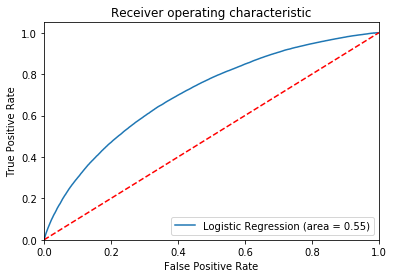

['pr', 'tas']


/home/clepore/.conda/envs/general_python3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0
[[ 1.34034886 -0.02272774]]
[5.17836996]
Accuracy of logistic regression classifier on test set: 0.77
log loss: 0.5053
0.540276782365082


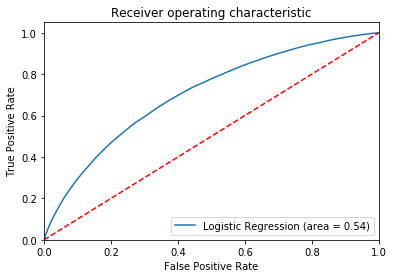

0.0


In [459]:
varname=['pr','tas' ,'cape'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregA = logreg
X_testA = X_test
alt_log_likelihood = -log_loss(y_test, logregA.predict_proba(X_test), normalize=False)

varname=['pr','tas'   ] 
print(varname)
X_train = X_trainT[varname]
X_test = X_testT[varname]
logreg = LogisticRegression(C=1e8)
logreg.fit(X_train, y_train)
print(logreg.verbose)
print(logreg.coef_)
print(logreg.intercept_)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('log loss: {:.4f}' .format(log_loss(y_test, logreg.predict_proba(X_test)))) 
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
print(logit_roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
logregB = logreg
X_testB = X_test
null_log_likelihood = -log_loss(y_test, logregB.predict_proba(X_test), normalize=False)

G = 2 * (alt_log_likelihood - null_log_likelihood)
df = X_testA.shape[1] - X_testB.shape[1]
p_value = chi2.sf(G, df)
print(p_value)
